<a href="https://colab.research.google.com/github/kechase/Chase_DSPN_S25/blob/main/ExerciseSubmissions/KChase_Exercise_7_Linear_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 7:  Linear models

This homework assignment is designed to give you practice with linear models and the bias-variance tradeoff.

You will need to download the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file from the *Homework/hcp_data* folder in the class GitHub repository.


This data is a portion of the [Human Connectome Project database](http://www.humanconnectomeproject.org/). It provides measures of cognitive tasks and brain morphology measuresments from 1206 participants. The full description of each variable is provided in the **HCP_S1200_DataDictionary_April_20_2018.csv** file in the *Homework datasets/hcp_data* folder in the class GitHub repository.

1. Loading the data 1/1
2. Initial data visualization 2/2
3. Linear regression 4/4
4. Plotting 2/2
5. Reflection 1/1

---
## 1. Loading the Data (1 point)

Use the `setwd` and `read.csv` functions to load data from the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file.

Using the tidyverse tools, make a new dataframe `d1` that only inclues the subject ID (`Subject`), gender (`Gender`), Flanker Task performance (`Flanker_Unadj`), total white matter volume (`FS_Tot_WM_Vol`), and total grey matter volume (`FS_Total_GM_Vol`) variables and remove all _na_ values.

Use the `head` function to look at the first few rows of each data frame.

In [ ]:
# If you are running this on your local computer, wet your workign directory to
# the location of the lexDat data by setting your harddrive. Uncomment this line
# and change the location to where it is on your computer.
#setwd("~/Documents/PittCMU/G3/DSPN/DataSciencePsychNeuro/Homeworks/hcp_data")

# If you are running this on Colab, then use something like this.
# system("gdown --id 1hywRmGdvhbDYTrQRyl1_bLJsq-T3GJq2")

# Make sure gdown is installed
system("pip install gdown")

# Authorize data access
system("gdown --id 1jX7f9k-VsO0JtxgkENsgO4Za_m-5HQX1")

# Load the packages
library(tidyverse)
library(dplyr)

hcp_data <- read.csv("unrestricted_trimmed_1_7_2020_10_50_44.csv")
d1 <- hcp_data %>%
select(Subject, Gender, Flanker_Unadj, FS_Tot_WM_Vol, FS_Total_GM_Vol) %>%
  drop_na()

head(d1)



── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


,Subject,Gender,Flanker_Unadj,FS_Tot_WM_Vol,FS_Total_GM_Vol
,<int>,<chr>,<dbl>,<int>,<int>
1,100206,M,130.42,543134,807245
2,100307,F,112.56,407292,664124
3,100408,M,121.18,500417,726206
4,100610,M,126.53,512946,762308
5,101006,F,101.85,429449,579632
6,101107,M,107.04,416995,665024


---
## 2. Initial data visualization (2 point)

Use the `pairs` function to look at all the pairwise scatterplots of the variables in `d1`. Describe which variables seem positively correlated, negatively correlated, or not correlated at all.

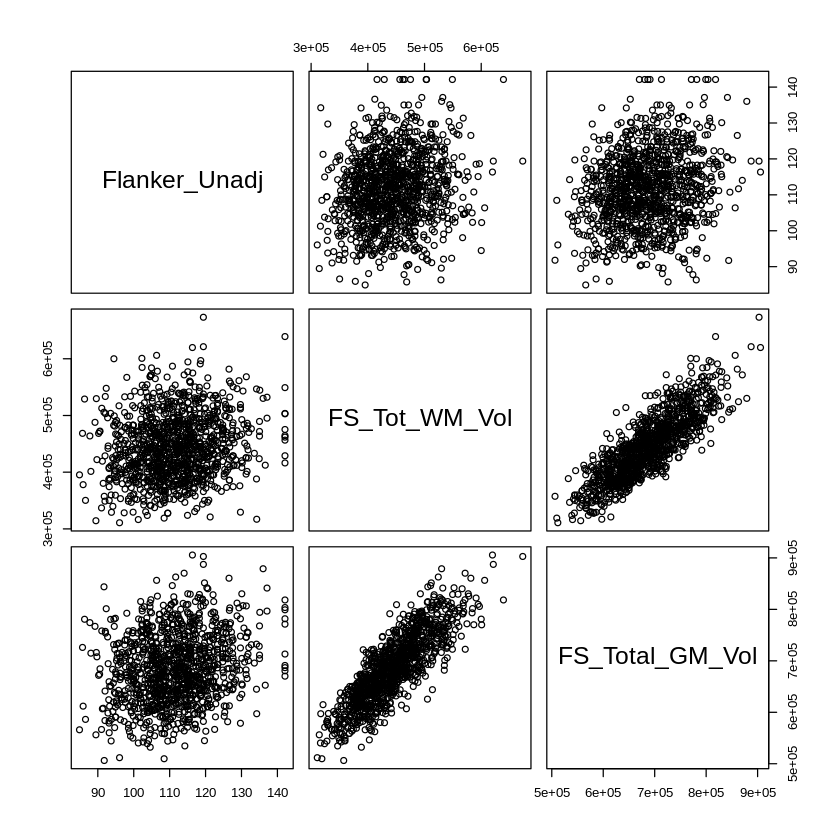

In [ ]:
# paired scatterplots
pairs(select(d1, Flanker_Unadj, FS_Tot_WM_Vol, FS_Total_GM_Vol))




> *There seems to be no correlation between  Flanker_Unadj (y) vs FS_Tot_WM_Vol (x) [1,2],  Flanker_Unadj (y) vs FS_Total_GM_Vol (x) [1,3], FS_Tot_WM_Vol (y) vs Flanker_Unadj (x) [2,1], or
FS_Total_GM_Vol (y) vs Flanker_Unadj (x) [3,1].*

> *However there does seem to be a positive correlation between FS_Tot_WM_Vol (y) vs FS_Total_GM_Vol (x) [2,3] and FS_Total_GM_Vol (y) vs FS_Tot_WM_Vol (x) [3,2]. This is essentially the same comparison, but on different axes.*



>

---
## 3. Linear regression (4 points)

Use the `lm` (linear model) function to determine the association between Flanker Task performance and total grey matter volume from the `d1` data frame.

$$
Y_{flanker} = \beta_0 + \beta_1 X_{GM volume}
$$

Show the results using the `summary` function, and report the mean coefficient values for $beta_0$ \& $\beta_1$ (`coef` function) and their 95\% confidence intervals (`confint` function). Is grey matter volume significantly associated with Flanker Task performance?

In [ ]:
# Linear model
model <- lm(Flanker_Unadj ~ FS_Total_GM_Vol, data = d1)
summary(model)

#get coefficients
coef(model)

#get 95% confidence interval
confint(model)




Call:
lm(formula = Flanker_Unadj ~ FS_Total_GM_Vol, data = d1)

Residuals:
     Min       1Q   Median       3Q      Max 
-28.2280  -6.5969  -0.0119   6.5497  31.0108 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     9.026e+01  3.041e+00  29.677  < 2e-16 ***
FS_Total_GM_Vol 3.110e-05  4.412e-06   7.048 3.18e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.864 on 1111 degrees of freedom
Multiple R-squared:  0.0428,	Adjusted R-squared:  0.04194 
F-statistic: 49.68 on 1 and 1111 DF,  p-value: 3.177e-12


(Intercept) FS_Total_GM_Vol 
   9.025646e+01    3.109965e-05

,2.5 %,97.5 %
(Intercept),8.428917e+01,9.622375e+01
FS_Total_GM_Vol,2.244198e-05,3.975733e-05


> *As per the output of the model, the mean coefficient values for  𝑏𝑒𝑡𝑎0  &  𝛽1  (coef function) are 90.2564608190942 and 3.10996547106464e-05, respectively, while their 95% confidence intervals are [8.428917e+01 to 9.622375e+01] and [2.244198e-05 to 3.975733e-05], respectively. A p-value of 3.18e-12 denoting the significance between grey matter volume association with with Flanker Task performance is a robust and compelling statistic showing a relationship.*
>

---
## 4. Plotting (2 points)

Use `ggplot` to plot the `FS_Total_GM_Vol` variable (x axis) against the `Flanker_Unadj` variable (y axis), as well as the regression line with confidence intervals on the regrssion line. Qualitatively describe what you see.

`geom_smooth()` using formula = 'y ~ x'


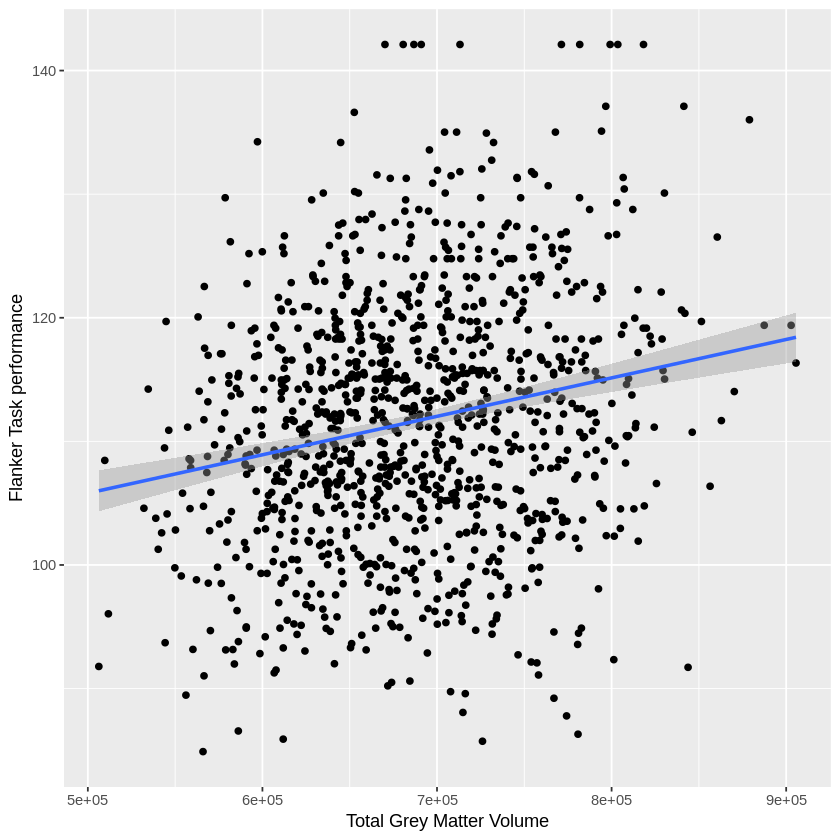

In [ ]:


#create a ggplot with regression line and confint
ggplot(d1, aes(x = FS_Total_GM_Vol, y = Flanker_Unadj)) +
  geom_point() +
  geom_smooth(method = "lm") +
  labs(x = "Total Grey Matter Volume",
      y = "Flanker Task performance",
      Title = "Comparing Total Grey Matter Volume to Flanker Task Performance")





> *This plot has a wide distribution of data in all directions, and shows a clear linear relationship between flanker task performance and total grey matter volume.*
>

---

## 5. Reflection (1 point)

What do you conclude based on the analyses above?

> *I see now that I couldn't make an honest assessment of the scatterplots above just by passing reference, I needed the regression line. There is a clear relationship between the Flanker Task Performance and the Total Grey Matter Volume, though the small R-squared value from the model summary above indicates that linear relationship is part of a bigger story.*
>

**DUE:** 5pm EST, February 24, 2025

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *As always, I worked on understanding coding with claude.ai*